In [9]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [10]:
from urllib.request import urlopen
import scipy.optimize
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import sklearn
from collections import defaultdict
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error


def parseDataFromURL(fname):
  for l in urlopen(fname):
    yield eval(l)

def parseData(fname):
  for l in open(fname):
    yield eval(l)
print("Reading data...")
# Download from http://cseweb.ucsd.edu/classes/fa19/cse258-a/data/beer_50000.json"
data = list(parseData("./beer_50000.json"))
import random 
random.shuffle(data)
training = data[:32000]
validation = data[32000:40000]
test = data[40000:50000]

Reading data...


Number of 0-1 ratings:  1
Number of 1-2 ratings:  372
Number of 2-3 ratings:  1685
Number of 3-4 ratings:  8420
Number of 4-5 ratings:  19300
Number of 5 ratings:  2222


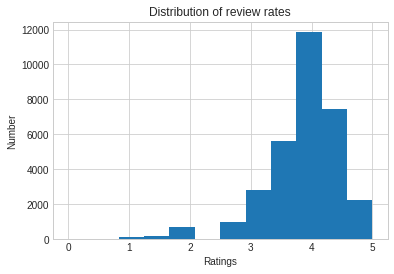

In [ ]:
y= [d['review/overall'] for d in training]


y0=[d['review/overall'] for d in training if d['review/overall']<1 and d['review/overall']>=0]
print("Number of 0-1 ratings: ",len(y0))
y1=[d['review/overall'] for d in training if d['review/overall']<2 and d['review/overall']>=1]
print("Number of 1-2 ratings: ",len(y1))
y2=[d['review/overall'] for d in training if d['review/overall']<3 and d['review/overall']>=2]
print("Number of 2-3 ratings: ",len(y2))
y3=[d['review/overall'] for d in training if d['review/overall']<4 and d['review/overall']>=3]
print("Number of 3-4 ratings: ",len(y3))
y4=[d['review/overall'] for d in training if d['review/overall']<5 and d['review/overall']>=4]
print("Number of 4-5 ratings: ",len(y4))
y5=[d['review/overall'] for d in training if d['review/overall']==5]
print("Number of 5 ratings: ",len(y5))


n, bins, patches=plt.hist(y,bins = 12)
plt.xlabel("Ratings")
plt.ylabel("Number")
plt.title("Distribution of review rates")
plt.show()

In [ ]:
print(data[:1])
print(len(data))

[{'review/appearance': 4.0, 'beer/style': 'American Double / Imperial IPA', 'review/palate': 4.0, 'review/taste': 4.0, 'beer/name': 'Founders Devil Dancer', 'review/timeUnix': 1315014537, 'user/gender': 'Male', 'user/birthdayRaw': 'Apr 8, 1977', 'beer/ABV': 12.0, 'beer/beerId': '17538', 'user/birthdayUnix': 229334400, 'beer/brewerId': '1199', 'review/timeStruct': {'isdst': 0, 'mday': 3, 'hour': 1, 'min': 48, 'sec': 57, 'mon': 9, 'year': 2011, 'yday': 246, 'wday': 5}, 'user/ageInSeconds': 1189001047, 'review/overall': 4.0, 'review/text': 'Poured from bottle into snifter\t\tA - clear pale amber with a thin head that quickly dissipated.\t\tS - hop bomb. Some faint aromas of alcohol and malt but it is quickly overwhelmed by hops. The hops were hard to pin down however. Seems like an interesting blend of hops.\t\tT - initially a nice balance of hops and malt with a slight alcohol burn. This brew finishes with a huge bitter finish though.\t\tM - Medium body with moderate carbonation. Nothing

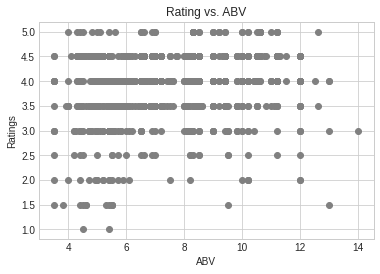

In [ ]:
x = [d['beer/ABV'] for d in training[:1000]]
plt.xlabel("ABV")
plt.ylabel("Ratings")
plt.title("Rating vs. ABV")
plt.scatter(x, y, color='gray');

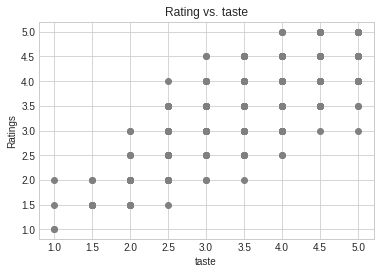

In [ ]:
x = [d['review/taste'] for d in training[:1000]]
plt.xlabel("taste")
plt.ylabel("Ratings")
plt.title("Rating vs. taste")
plt.scatter(x, y, color='gray');

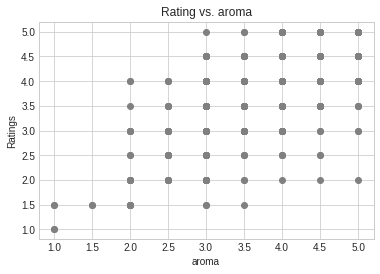

In [ ]:
x = [d['review/aroma'] for d in training[:1000]]
plt.xlabel("aroma")
plt.ylabel("Ratings")
plt.title("Rating vs. aroma")
plt.scatter(x, y, color='gray');

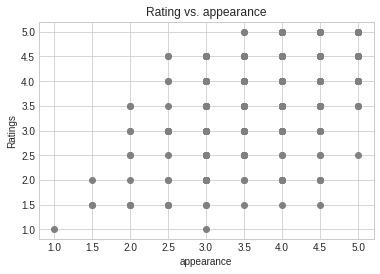

In [ ]:
x = [d['review/appearance'] for d in training[:1000]]
plt.xlabel("appearance")
plt.ylabel("Ratings")
plt.title("Rating vs. appearance")
plt.scatter(x, y, color='gray');

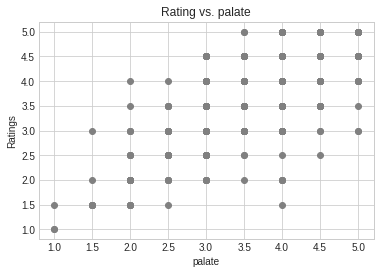

In [ ]:
x = [d['review/palate'] for d in training[:1000]]
plt.xlabel("palate")
plt.ylabel("Ratings")
plt.title("Rating vs. palate")
plt.scatter(x, y, color='gray');

In [ ]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk
nltk.download('punkt')
nltk.download('movie_reviews')
text          = "nice" 

sent          = TextBlob(text)
# The polarity score is a float within the range [-1.0, 1.0]
# where negative value indicates negative text and positive
# value indicates that the given text is positive.
polarity      = sent.sentiment.polarity
# The subjectivity is a float within the range [0.0, 1.0] where
# 0.0 is very objective and 1.0 is very subjective.
subjectivity  = sent.sentiment.subjectivity

sent          = TextBlob(text, analyzer = NaiveBayesAnalyzer())
classification= sent.sentiment.classification
positive      = sent.sentiment.p_pos
negative      = sent.sentiment.p_neg

print(polarity,subjectivity,classification,positive,negative)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
0.6 1.0 pos 0.5462962962962964 0.45370370370370355


In [ ]:
pip install vaderSentiment

In [23]:
# import SentimentIntensityAnalyzer class 
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    #print("Overall sentiment dictionary is : ", sentiment_dict) 
    #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    #print("Sentence Overall Rated As", end = " ") 
  
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        return "Positive"
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
  
    else : 
        return "Neutral" 
  

    
# Driver code 
if __name__ == "__main__" : 
  
    print("\n1st statement :") 
    sentence = "This is the best movie I have watched ever!" 
  
    # function calling 
    print(sentiment_scores(sentence) )
  
    print("\n2nd Statement :") 
    sentence = "I went to the market"
    print(sentiment_scores(sentence) )
    print("\n3rd Statement :") 
    sentence = "I would not recommend this product to you"
    print(sentiment_scores(sentence) )

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


ModuleNotFoundError: ignored

Cosine

In [11]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated
itemNames = {}
ratingDict = {} # To retrieve a rating for a specific user/item pair
ratingMean = sum([d['review/overall'] for d in data]) / len(data)
for d in training:
    user,item = d['user/profileName'], d['beer/beerId']
    usersPerItem[item].add(user)
    itemsPerUser[user].add(item)
    ratingDict[(user,item)] = d['review/overall']

reviewsPerUser = defaultdict(list)
reviewsPerItem = defaultdict(list)
for d in training:
    user,item =d['user/profileName'], d['beer/beerId']
    reviewsPerUser[user].append(d)
    reviewsPerItem[item].append(d)
userAverages = {}
itemAverages = {}

for u in itemsPerUser:
    rs = [ratingDict[(u,i)] for i in itemsPerUser[u]]
    userAverages[u] = sum(rs) / len(rs)
    
for i in usersPerItem:
    rs = [ratingDict[(u,i)] for u in usersPerItem[i]]
    itemAverages[i] = sum(rs) / len(rs)

def Cosine(i1, i2):
    # Between two items
    inter = usersPerItem[i1].intersection(usersPerItem[i2])
    numer = 0
    denom1 = 0
    denom2 = 0
    for u in inter:
        numer += ratingDict[(u,i1)]*ratingDict[(u,i2)]
    for u in usersPerItem[i1]:
        denom1 += ratingDict[(u,i1)]**2
    for u in usersPerItem[i2]:
        denom2 += ratingDict[(u,i2)]**2
    denom = math.sqrt(denom1) * math.sqrt(denom2)
    if denom == 0: return 0
    return numer / denom

In [12]:
print(ratingMean)

3.88871


In [13]:
def predictRating(user,item):
    ratings = []
    similarities = []
    for d in reviewsPerUser[user]:
        i2 = d['beer/beerId']
        if i2 == item: continue
        ratings.append(d['review/overall'] - itemAverages[i2])
        similarities.append(Cosine(item,i2))
    if (sum(similarities) > 0):
        weightedRatings = [(x*y) for x,y in zip(ratings,similarities)]
        return itemAverages[item] + sum(weightedRatings) / sum(similarities)
    else:
        # User hasn't rated any similar items
        return ratingMean

In [14]:
import math
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)


baseline

In [15]:
labels = [d['review/overall'] for d in training] 
simPredictions = [ratingMean for d in training]
print("MSE of training set when using baseline:")
print(MSE(simPredictions, labels))

labelsT = [d['review/overall'] for d in test]
simPredictionsT = [ratingMean for d in test]
print("MSE when test set using baseline:")
MSE(simPredictionsT, labelsT)

MSE of training set when using baseline:
0.49441275316249894
MSE when test set using baseline:


0.48271715009999433

In [16]:
simPredictions1 = [predictRating(d['user/profileName'], d['beer/beerId']) for d in training]
print("MSE for training when using Cosine:")
print(MSE(simPredictions1, labels))
simPredictions1T = [predictRating(d['user/profileName'], d['beer/beerId']) for d in test]
print("MSE for testing when using Cosine:")
MSE(simPredictions1T, labelsT)

MSE for training when using Cosine:
0.38616685798338385
MSE for testing when using Cosine:


0.4203903815972514

SVM with simple bag of words/ also includes ridge

In [24]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
#stemmer = PorterStemmer()
punctuation.remove("-")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
sw = stopwords.words("english")
sws = set(sw)

In [26]:
for d in training:
    r = ''.join([c for c in d['review/text'].lower() if not c in punctuation])
    for w in r.split():
        #w = stemmer.stem(w)
        if w not in sws:
          wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

In [27]:
words = [x[1] for x in counts[:900]]#count tune
print("Top 10 common words and their frequencies:")
for i in range(50):
    print(counts[i])

Top 10 common words and their frequencies:
(39371, 'beer')
(30997, 'head')
(22004, 'taste')
(21017, 'nice')
(19498, 'good')
(18801, 'malt')
(18540, '-')
(18108, 'like')
(18105, 'hops')
(17454, 'one')
(17101, 'sweet')
(16776, 'dark')
(16368, 'light')
(15038, 'flavor')
(14792, 'bit')
(14380, 'carbonation')
(13944, 'chocolate')
(13326, 'well')
(13318, 'aroma')
(13038, 'coffee')
(12778, 'little')
(12745, 'glass')
(12237, 'smell')
(11913, 'finish')
(11602, 'bottle')
(11433, 'color')
(11385, 'pours')
(11308, 'mouthfeel')
(11070, 'lacing')
(11033, 'hop')
(10881, 'alcohol')
(9980, 'body')
(9914, 'really')
(9856, 'brown')
(9503, 'caramel')
(9495, 'much')
(9215, 'poured')
(9059, 'smooth')
(9006, 'bitter')
(8897, 'bitterness')
(8818, 'great')
(8714, 'medium')
(8647, 'would')
(8587, 'malts')
(8196, 'nose')
(8137, 'flavors')
(7989, 'notes')
(7781, 'black')
(7586, 'roasted')
(7453, 'thick')


In [28]:
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)
def feature(datum):
    feat = [0]*(len(words))
    r = ''.join([c for c in datum['review/text'].lower() if not c in punctuation])
    for w in r.split():
        if w in words:
            feat[wordId[w]] += 1
    feat.append(1) # offset
    return feat
X = [feature(d) for d in training]
y = [d['review/overall'] for d in training]
X_v = [feature(d) for d in validation]
y_v = [d['review/overall'] for d in validation]
# Regularized regression


In [30]:
from sklearn.linear_model import Ridge
def pipeline():
    mseTrain=[]
    mseValid=[]
    for lamb in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        clf = Ridge(alpha=lamb)
        clf.fit(X, y)
        mseTrain.append(MSE(y,clf.predict(X)))
        mseValid.append(MSE(y_v,clf.predict(X_v)))
    return mseTrain,mseValid
x,yy = pipeline()
print("for lamb in [0.001, 0.01, 0.1, 1, 10, 100, 1000], MSE for training: ")
print(x)
print("for lamb in [0.001, 0.01, 0.1, 1, 10, 100, 1000], MSE for validation: ")
print(yy)

KeyboardInterrupt: ignored

In [ ]:
clf1 = Ridge(alpha=100)
clf1.fit(X,y)
X_t = [feature(d) for d in test]
y_t = [d['review/overall'] for d in test]
predictions = clf1.predict(X_t)
print("MSE:")
MSE(predictions, y_t)

MSE:


0.32628363494508705

In [ ]:
#from sklearn.svm import SVR
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler
#import numpy as np


#def pipeline(): 
 #   mseTrain=[]
  #  mseValid=[]
   # for lamb in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    #    clf = SVR(C=lamb)
     #   clf.fit(X, y)
      #  mseTrain.append(MSE(y,clf.predict(X)))
       # mseValid.append(MSE(y_v,clf.predict(X_v)))
    #return mseTrain,mseValid
#x,yy = pipeline()
#print("for lamb in [0.001, 0.01, 0.1, 1, 10, 100, 1000], MSE for training: ")
#print(x)
#print("for lamb in [0.001, 0.01, 0.1, 1, 10, 100, 1000], MSE for validation: ")
#print(yy)

Decision Tree

In [ ]:
def feature1(datum):
    feat = [0]*(len(words))
    r = ''.join([c for c in datum['review/text'].lower() if not c in punctuation])
    for w in r.split():
        if w in words:
            feat[wordId[w]] += 1
    feat.append(datum['beer/ABV'])
    feat.append(1) # offset
    
    return feat

In [ ]:
X1 = [feature1(d) for d in training]
y = [d['review/overall'] for d in training]
X_v1 = [feature1(d) for d in validation]
y_v = [d['review/overall'] for d in validation]
X_t1 = [feature1(d) for d in test]
y_v = [d['review/overall'] for d in test]

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
predictions = clf.predict(X_t)
print("MSE for decision tree:",MSE(predictions,y_t))

MSE for decision tree: 0.6884645144628099


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=2, random_state=0)
#regr.fit(X, y)
#predictions = clf.predict(X_t)
#print("MSE for random forest:",MSE(predictions,y_t))
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
X = [feature1(d) for d in data[:40000]]
y = [d['review/overall'] for d in data[:40000]]
rf_random.fit(X, y)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


exception calling callback for <Future at 0x7fe7c26e6f10 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 104, in get
    if not self._poll(timeout):
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 414, in _poll
    r = wait([self], timeout)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 921, in wait
    ready = selector.select(timeout)
  File "/usr/lib/python3.7/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt
"""

The above exception was the direct cause of the following

KeyboardInterrupt: ignored

In [ ]:
rf_random.best_params_
best_random = rf_random.best_estimator_
X_t = [feature1(d) for d in data[40000:50000]]
y_t = [d['review/overall'] for d in data[40000:50000]]
predictions = best_random.predict(X_t)
print("MSE for random forest:",MSE(predictions,y_t))

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
clf = SVR(C=100)
clf.fit(X, y)
predictions=clf.predict(X_t)
print("MSE for svm:",MSE(predictions,y_t))

Ensemble voting regressor

In [21]:
 import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
r1 = Ridge(alpha=100)
r2 = tree.DecisionTreeRegressor()
er = VotingRegressor([('lr', r1), ('rf', r2)])
er.fit(X, y)
print(MSE(er.predict(X_t),y_t))

NameError: ignored

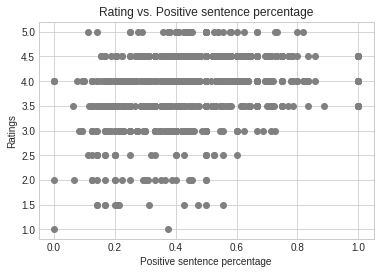

In [ ]:
def feature2(datum):
    r = datum['review/text'].split('.')
    positive = 0

    for s in r:
        if sentiment_scores(s) =="Positive":
            positive += 1
    positiverate = positive/len(r)
    
    return positiverate
x = [feature2(d) for d in training[:1000]]
y = [d['review/overall'] for d in training[:1000]]
plt.xlabel("Positive sentence percentage")
plt.ylabel("Ratings")
plt.title("Rating vs. Positive sentence percentage")
plt.scatter(x, y, color='gray');

In [ ]:
def feature3(datum):
    r = datum['review/text'].split('.')
    po = 0

    for s in r:
        if sentiment_scores(s) =="Positive":
            po += 1
    positiverate = po/len(r)
    
    return positiverate
positive = [feature3(d) for d in data]


KeyboardInterrupt: ignored

In [ ]:
def feature2(datum):
    #r = datum['review/text'].split('.')
    feature = []
    #positive = 0
    feature.append(sentiment_scores(datum['review/text'])=="Positive")
    feature.append(datum['review/taste'])
    feature.append(datum['review/aroma'])
    feature.append(datum['review/appearance'])
    feature.append(datum['review/palate'])
    feature.append(1)
    return feature

X = [feature2(d) for d in training]
y = [d['review/overall'] for d in training]
X_v = [feature2(d) for d in validation]
y_v = [d['review/overall'] for d in validation]
from sklearn.linear_model import Ridge
def pipeline():
    mseTrain=[]
    mseValid=[]
    for lamb in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        clf = Ridge(alpha=lamb)
        clf.fit(X, y)
        mseTrain.append(MSE(y,clf.predict(X)))
        mseValid.append(MSE(y_v,clf.predict(X_v)))
    return mseTrain,mseValid
x,yy = pipeline()
print("for lamb in [0.001, 0.01, 0.1, 1, 10, 100, 1000], MSE for training: ")
print(x)
print("for lamb in [0.001, 0.01, 0.1, 1, 10, 100, 1000], MSE for validation: ")
print(yy)

KeyboardInterrupt: ignored

In [ ]:
clf1 = Ridge(alpha=100)
clf1.fit(X,y)
X_t = [feature2(d) for d in test]
y_t = [d['review/overall'] for d in test]
predictions = clf1.predict(X_t)
print("MSE:")
MSE(predictions, y_t)

In [ ]:
sentiment_scores(sentiment_scores(data[0]['review/text']))

'Positive'

In [32]:
from sklearn.linear_model import Ridge
def feature4(datum):
    feat = [0]*(len(words))
    r = ''.join([c for c in datum['review/text'].lower() if not c in punctuation])
    for w in r.split():
        if w in words:
            feat[wordId[w]] += 1
    feat.append(datum['beer/ABV'])
    feat.append(predictRating(datum['user/profileName'], datum['beer/beerId']))
    feat.append(1) # offset
    return feat

X = [feature4(d) for d in training]
y = [d['review/overall'] for d in training]
X_v = [feature4(d) for d in validation]
y_v = [d['review/overall'] for d in validation]
X_t = [feature4(d) for d in test]
y_t = [d['review/overall'] for d in test]

clf = Ridge(alpha=100)

clf = clf.fit(X, y)
predictions = clf.predict(X_t)
print("MSE for decision tree:",MSE(predictions,y_t))

MSE for decision tree: 0.30091441966789917


In [33]:
print(clf.coef_)

[ 4.46096128e-05  6.29304622e-03 -1.70675225e-02  2.88897735e-02
  2.57646545e-02  1.16353427e-03 -5.67113862e-03 -1.06643243e-02
  4.17424883e-03 -1.49504819e-02 -1.08127836e-02  5.55639430e-03
  4.71667139e-03 -7.57402574e-03 -1.28845873e-02 -5.31620240e-03
  2.70536417e-02  1.61950986e-02  1.29307043e-03  1.76794701e-02
 -9.75693172e-03  7.40284089e-03  3.35016557e-03 -1.22169135e-02
 -2.64920164e-02 -3.92481462e-03 -7.74156994e-03 -9.06279312e-03
  3.58500086e-04  1.04031268e-02 -3.13761209e-02 -1.91643640e-02
 -6.20995865e-03  9.06439272e-03  7.09304361e-03 -2.95275676e-02
 -1.84327352e-03  6.89365487e-02 -1.38830278e-02 -6.23884856e-03
  6.67822552e-02  2.42225442e-02 -2.25887737e-02 -4.80131351e-03
  1.39064389e-03 -9.79488503e-03 -1.11726134e-02  6.80923090e-03
  8.33782688e-03  8.02697368e-03 -5.03353962e-03 -1.43766029e-02
  6.98988372e-04 -1.33448174e-02  1.94254608e-02  8.11369710e-03
  2.51473381e-02 -2.44149315e-02  1.05888646e-02 -5.98762520e-03
 -1.28678561e-03  2.39374